In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg
import seaborn as sns

In [19]:
df = pd.read_csv('tested_patients.csv',low_memory=False)
print(df)

      test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0    30-04-2020      0      0            0                    0          0   
1    30-04-2020      1      0            0                    0          0   
2    30-04-2020      0      1            0                    0          0   
3    30-04-2020      1      0            0                    0          0   
4    30-04-2020      1      0            0                    0          0   
..          ...    ...    ...          ...                  ...        ...   
244  30-04-2020      1      0            0                    0          0   
245  30-04-2020      0      0            0                    0          0   
246  30-04-2020      1      0            0                    1          0   
247  30-04-2020      0      0            0                    0          0   
248  30-04-2020      0      0            0                    0          0   

    corona_result  
0        negative  
1        negative  
2  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
test_date              249 non-null object
cough                  249 non-null int64
fever                  249 non-null int64
sore_throat            249 non-null int64
shortness_of_breath    249 non-null int64
head_ache              249 non-null int64
corona_result          249 non-null object
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [21]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
0,30-04-2020,0,0,0,0,0,negative
1,30-04-2020,1,0,0,0,0,negative
2,30-04-2020,0,1,0,0,0,negative
3,30-04-2020,1,0,0,0,0,negative
4,30-04-2020,1,0,0,0,0,negative


In [22]:
#target = df['corona_result']
#df1 = df[['cough','fever', 'sore_throat','shortness_of_breath','head_ache']]
#print(df1)
#target
#X = df1
#X
#label encoding
#le = LabelEncoder()
#target = le.fit_transform(target)
#target
#y = target
#y

#d = {'negative': 0 , 'positive': 1 , 'other': 1, 'None': 0}
#df['corona_result'] = df['corona_result'].map(d)
#df
#df1 = df.copy()
#df1 = df1.drop('corona_result', axis =1) 

d = {'negative': 0 , 'positive': 1 , 'other': 1, 'None': 0}
df['corona_result'] = df['corona_result'].map(d)
y= df['corona_result']
print(y)

features = ['cough','fever', 'sore_throat','shortness_of_breath','head_ache']
X = df[features]
X

0      0
1      0
2      0
3      0
4      0
      ..
244    0
245    0
246    1
247    0
248    1
Name: corona_result, Length: 249, dtype: int64


,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
244,1,0,0,0,0
245,0,0,0,0,0
246,1,0,0,1,0
247,0,0,0,0,0


In [23]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (199, 5)
Testing split input-  (50, 5)


In [36]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [37]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        45
           1       0.00      0.00      0.00         5

    accuracy                           0.90        50
   macro avg       0.45      0.50      0.47        50
weighted avg       0.81      0.90      0.85        50



c:\users\pramila dalavai\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1, 'Accuracy Score: 0.9')

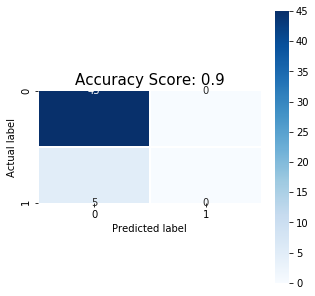

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)